# Demo 2: Plotting

Initialize KAN and create dataset

In [1]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=1)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

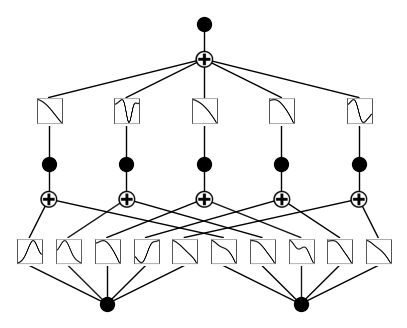

In [2]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

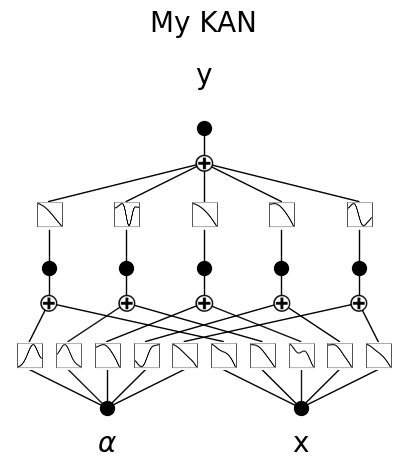

In [3]:
# if you want to add variable names and title
model.plot(beta=100, in_vars=[r'$\alpha$', 'x'], out_vars=['y'], title = 'My KAN')

Train KAN with sparsity regularization

In [4]:
# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01, auto_save=True);

train loss: 5.55e-02 | test loss: 5.69e-02 | reg: 5.02e+00 : 100%|██| 20/20 [00:12<00:00,  1.56it/s]


$\beta$ controls the transparency of activations. Larger $\beta$ => more activation functions show up. We usually want to set a proper beta such that only important connections are visually significant. transparency is set to be ${\rm tanh}(\beta \phi)$ where $\phi$ is the scale of the activation function (metric='act') or the feature attribution score (metric='fa'). By default $\beta=3$ and metric='fa'.

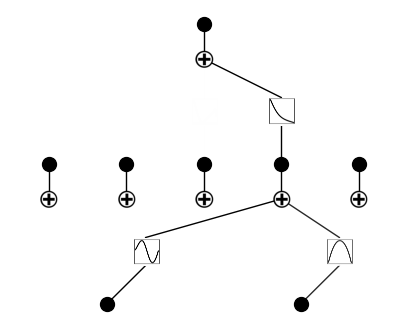

In [5]:
model.plot()

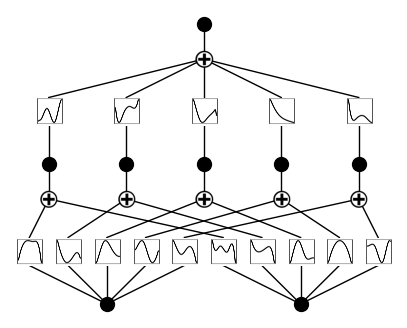

In [6]:
model.plot(beta=100000)

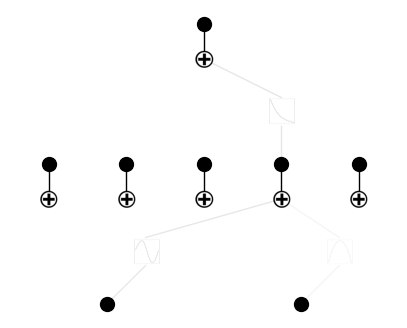

In [7]:
model.plot(beta=0.1)

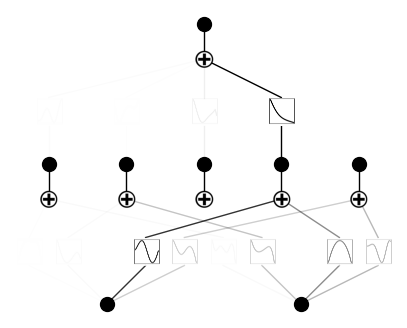

In [8]:
model.plot(metric='act')

Remove insignificant neurons

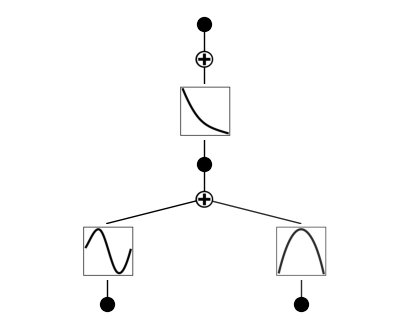

In [9]:
model = model.prune()
model.plot()

Resize the figure using the "scale" parameter. By default: 0.5

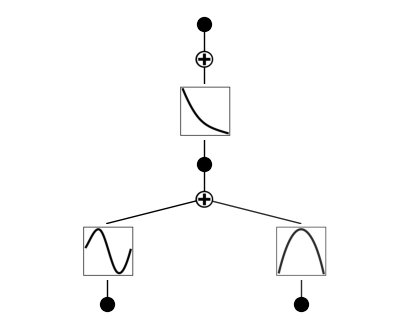

In [10]:
model.plot(scale=0.5)

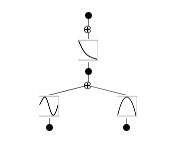

In [11]:
model.plot(scale=0.2)

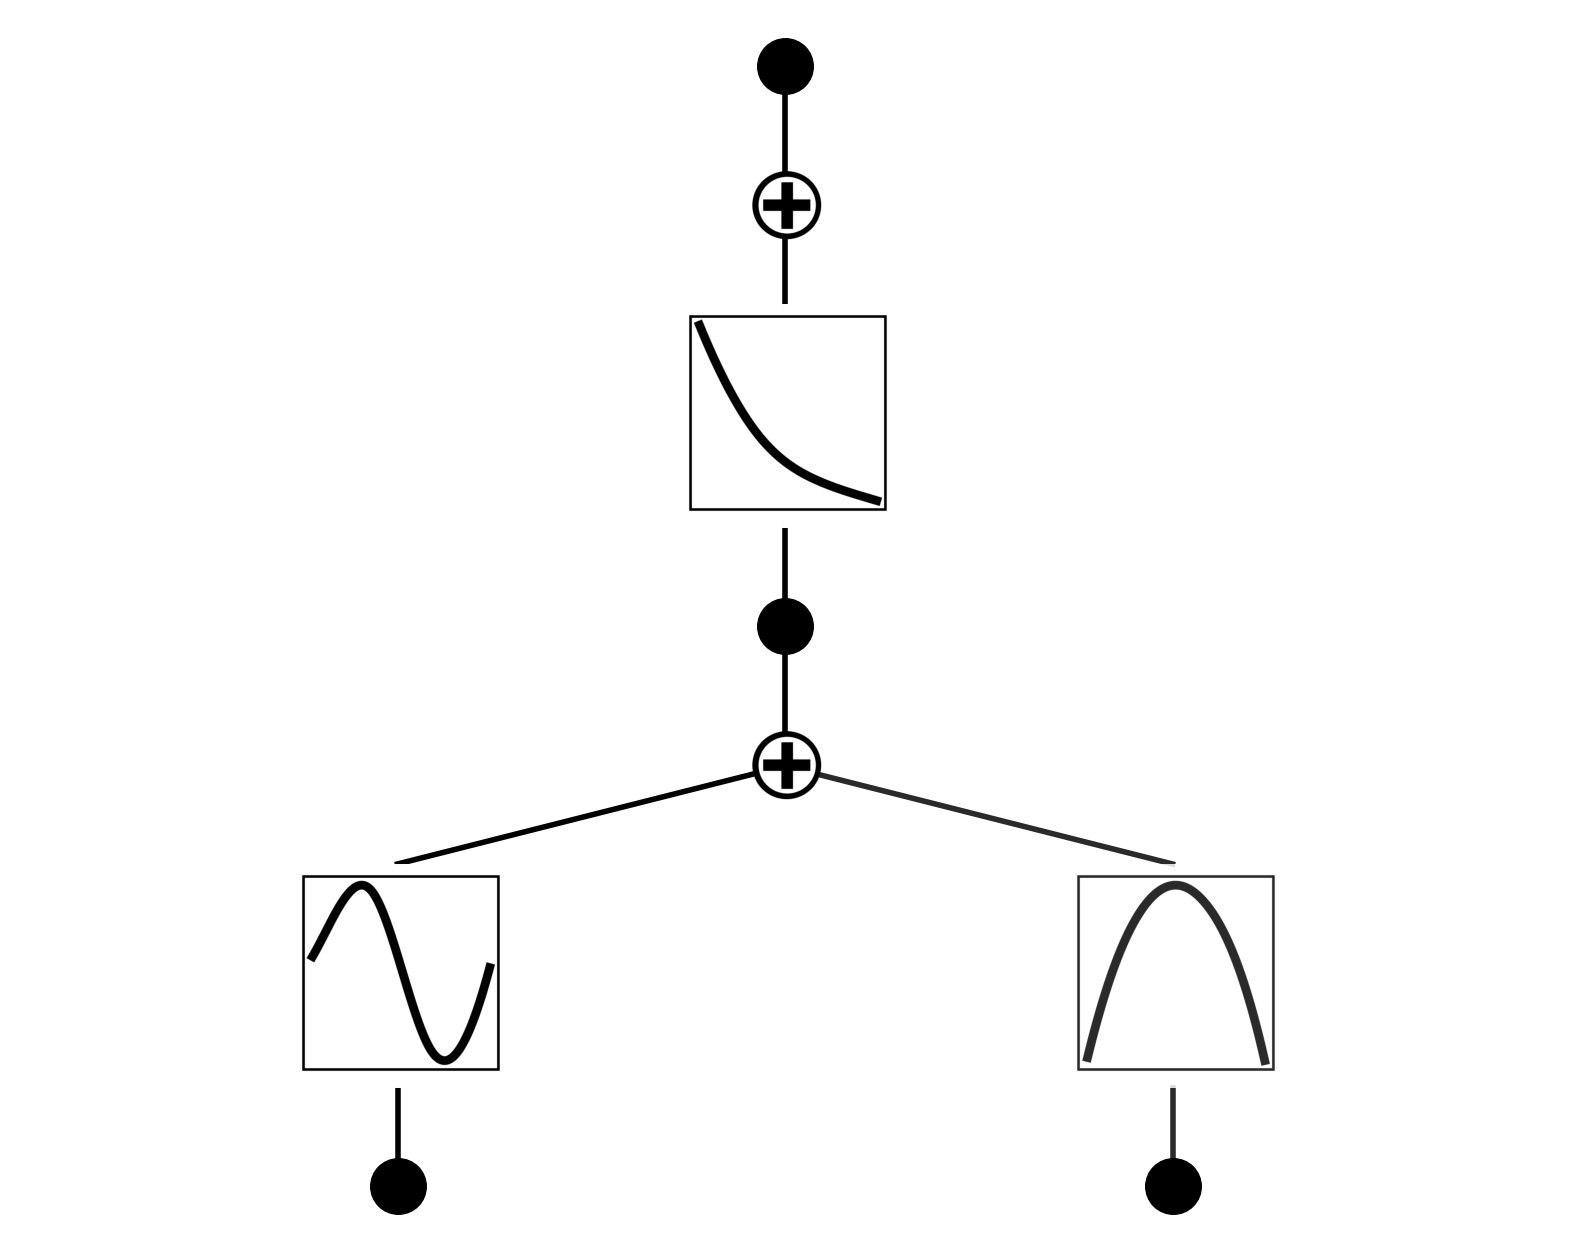

In [12]:
model.plot(scale=2.0)

If you want to see sample distribution in addition to the line, set "sample=True"

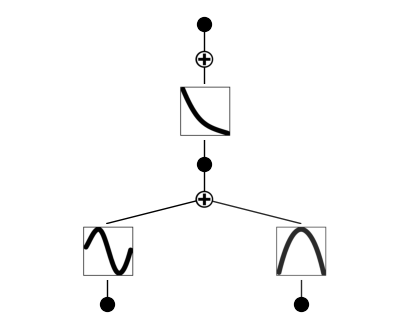

In [13]:
model.plot(sample=True)

The samples are more visible if we use a smaller number of samples

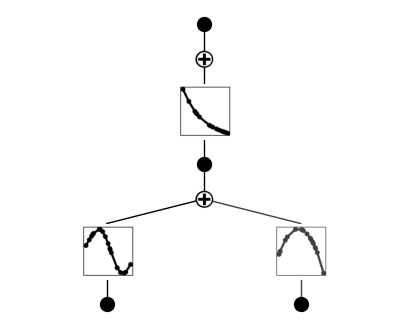

In [14]:
model.get_act(dataset['train_input'][:20])
model.plot(sample=True)

If a function is set to be symbolic, it becomes red

In [15]:
model.fix_symbolic(0,1,0,'x^2')

r2 is 0.9991374611854553


tensor(0.9991)

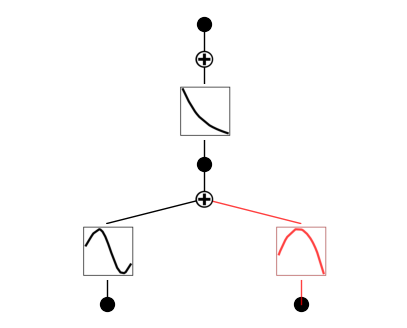

In [16]:
model.plot()

If a function is set to be both symbolic and numeric (its output is the addition of symbolic and spline), then it shows up in purple

In [17]:
model.set_mode(0,1,0,mode='ns')

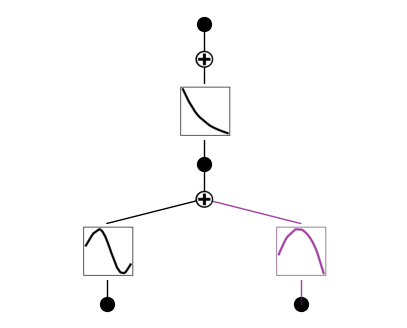

In [18]:
model.plot()